In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('C:/Users/etokarev/OneDrive - Philip Morris International/Desktop/private/Netology/Python/Homework/_24/HR.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#oосновные характеристики
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
 #Мода
data.mode()[:1]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


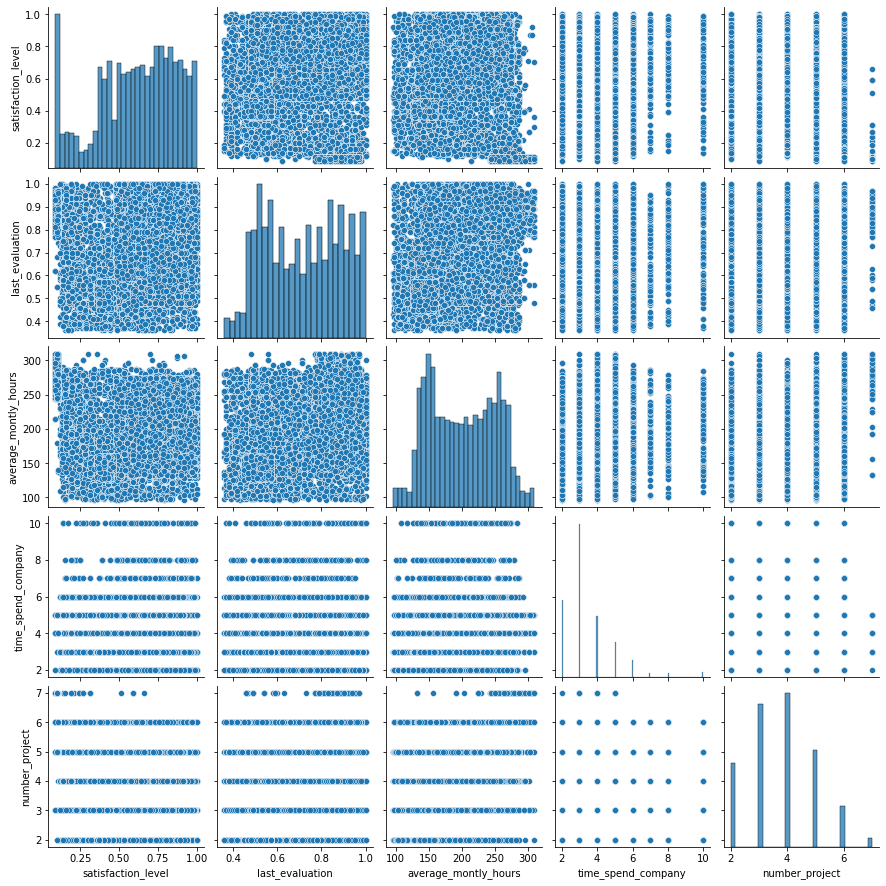

In [13]:
import seaborn as sns
data_quantity=data[['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company','number_project']]
sns.pairplot(data_quantity)

In [24]:
# т.к распределение не очень похоже на нормальное,есть ассиметричность в уровне удовлетворенности,
# то  будем использовать ранговые коэффициенты корреляции
data_corr=data_quantity.corr(method='spearman')
data_corr

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,number_project
satisfaction_level,1.000000,0.162407,0.062000,-0.139428,0.005786
last_evaluation,0.162407,1.000000,0.342061,0.161154,0.350399
average_montly_hours,0.062000,0.342061,1.000000,0.168750,0.397855
time_spend_company,-0.139428,0.161154,0.168750,1.000000,0.251971
number_project,0.005786,0.350399,0.397855,0.251971,1.000000


<AxesSubplot:>

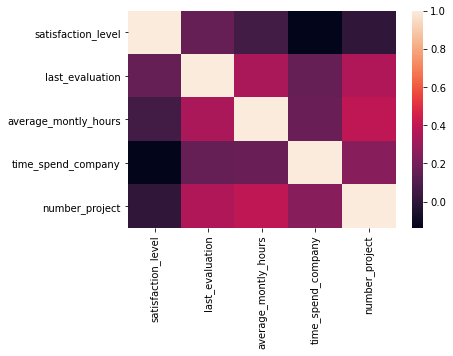

In [22]:
sns.heatmap(data_corr)

Две самые скоррелированные - average_montly_hours & number_project (тем не менее корреляция слабая) и две наименее скоррелированные переменные - satisfaction level and number_project.

In [29]:
# сколько сотрудников работает в каждом департаменте
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [117]:
#Показать распределение сотрудников по зарплатам.
by_salary=data['salary'].value_counts()
by_salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:>

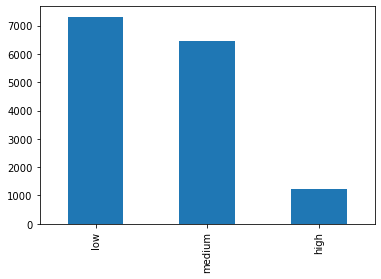

In [118]:
by_salary.plot(kind='bar')

In [41]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
dept_salary=pd.pivot_table(data,values='satisfaction_level', index='department', columns='salary',aggfunc='count')
dept_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:xlabel='department'>

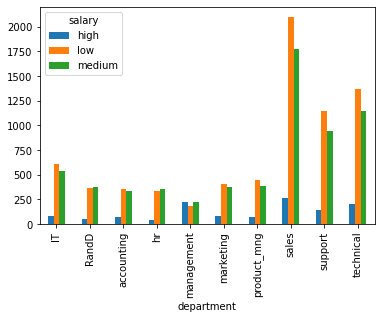

In [119]:
dept_salary.plot(kind='bar')

In [60]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом
from scipy import stats
data_salary_high=data[data['salary']=='high']
data_salary_low =data[data['salary']=='low']
print("Average High ",data_salary_high['average_montly_hours'].mean())
print("Average Low ",data_salary_low['average_montly_hours'].mean())
t,p=stats.ttest_ind(data_salary_high['average_montly_hours'],data_salary_low['average_montly_hours'])
t,p

Average High  199.86742118027485
Average Low  200.9965828321487


(-0.7288680398062308, 0.4661023478267259)

Не можем отвергнуть H0. Нельзя сказать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом

In [59]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#Средняя степень удовлетворенности

In [62]:
data.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [63]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#Среднее количество проектов
data.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [64]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#Доля сотрудников с повышением за последние 5 лет
data.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
#модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов

In [116]:
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

x=data[['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company',
        'number_project', 'promotion_last_5years','Work_accident']]
y=data['left']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
#lda.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.759